### US Arrest - Unsupervise Machine Learning
In this project, unsupervised machine learning is applied on the the US arrest dataset from 1973 to gain insights into which US states are likely to be the safest states to live in back in 1973. The dataset is taken from: https://www.kaggle.com/datasets/kurohana/usarrets.

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Section 1 - Exploratory Data Analysis

In [2]:
# load the dataset
df = pd.read_csv('UsArrests.csv')
df

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


There are 50 entries in the dataset, each representing a US state (the 1st column has been mis-labelled as 'City'). The rest of the columns contain data for murder, assault, and rape (in arrests per 100,000 residents) (in the columns 'Murder', 'Assault', and 'Rape' respectively). The column 'UrbanPop' contains data for the percentage of the population living in urban areas.
</br> First, we'll rename the 'City' column as 'State' & set it as the index. Afterwards, we'll look at the data types, look for missing values, and lastly, look at the general statistics of the dataset (below).

In [3]:
df.rename(columns = {'City': 'State'}, inplace=True)
df.set_index('State', inplace=True)

print(df.head())
print('\n')
print(df.info())
print('\n')
print(df.isnull().sum())

            Murder  Assault  UrbanPop  Rape
State                                      
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


In [4]:
# use describe to display general statistics about the dataset.
stats = df.describe()
stats

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
# display essential statistics for each feature
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.788,4.355510,0.8,17.4
Assault,170.760,83.337661,45.0,337.0
UrbanPop,65.540,14.474763,32.0,91.0
Rape,21.232,9.366385,7.3,46.0


The dataset now has the state name as the index and there are no missing values (so that value imputations will not be required). In addition, all data under all 4 features are already in the correct numberical data types (float64 or int64).
To further understand the data, next, we'll visualise the distributions of the data using histograms. In addition, any possible correlations between the features will be examined through a heatmap (below).

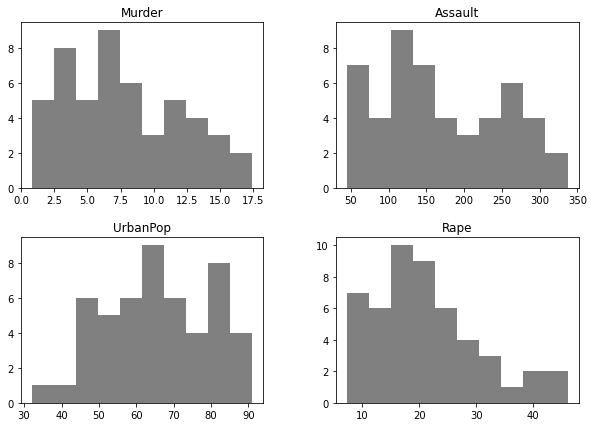

In [6]:
# plot histograms for all features
histograms = df.hist(color='grey', grid=False, figsize=(10,7))
plt.tight_layout
plt.show()

</br> Interestingly, if we examine the statistics tables and histograms above, the values of the different features are in different magnitudes (e.g. 'Murder' ranges from 0.8-17.4, whereas 'Assault' ranges from 45-337). Therefore, later on, the data will need to be scaled to avoid one feature from dominating future predictions. 

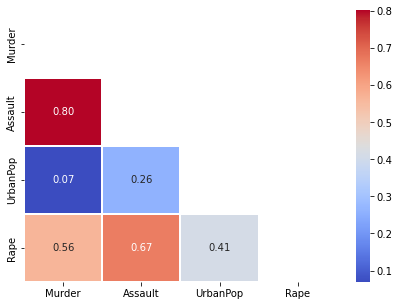

In [7]:
# get correlations
corrs = df.corr()

# Plot figsize
fig, ax = plt.subplots(figsize=(7, 5))

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate heatmap, with annotations of the correlation strength and 2-decimal floats
ax = sns.heatmap(corrs, cmap='coolwarm', annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

plt.show()

From the heatmap, we can see a strong positive correlation between Assault & Murder, as well as moderate positive correlations between Rape & Murder, Assault & UrbanPop. Therefore, the data is a good candidate for PCA.

### Section 2 - Principal Component Analysis
In this section, the data are scaled & PCA is applied on the scaled data.

In [8]:
# First, the data are scaled
x = StandardScaler().fit_transform(df.values)

# PCA is applied & the principal components (PC's) are generated.
pca = PCA()
principal_components = pca.fit_transform(x)
pca_df = pd.DataFrame(principal_components, index = df.index)
pca_df.head(10)

,0,1,2,3
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


To better visualise the values of the four principal components (PC's) for each state, a heatmap is generated below.

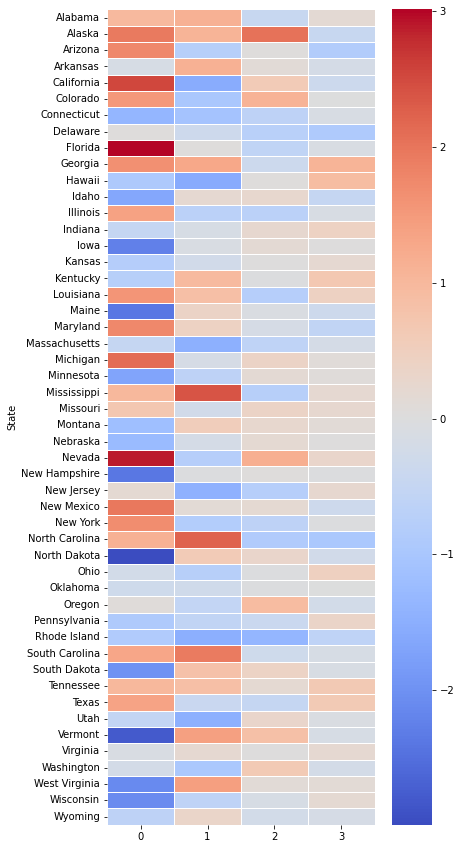

In [9]:
plt.figure(figsize=(6,15))
ax = sns.heatmap(pca_df,cmap='coolwarm', linewidth=1)
plt.show()

At first glance of the heatmap above, strong colours are observed for PC1 and PC2, whereas the heatmap colours for the other two PC's are more subdued. This suggests that PC1 and PC2 may explain most of the variance in the data. Therefore, to better gain a better understanding, a biplot of PC1 vs PC2 is generated below.

In [10]:
# The name of the states are stored in a variable 'states'
states = df.index
# and features are stored in a variable 'labels'
labels = df.columns

# A function to generate a biplot
def biplot(score,coeff,labels=None,points=None):
    
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(12,8))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1",fontsize=16)
    plt.ylabel("PC2",fontsize=16)
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

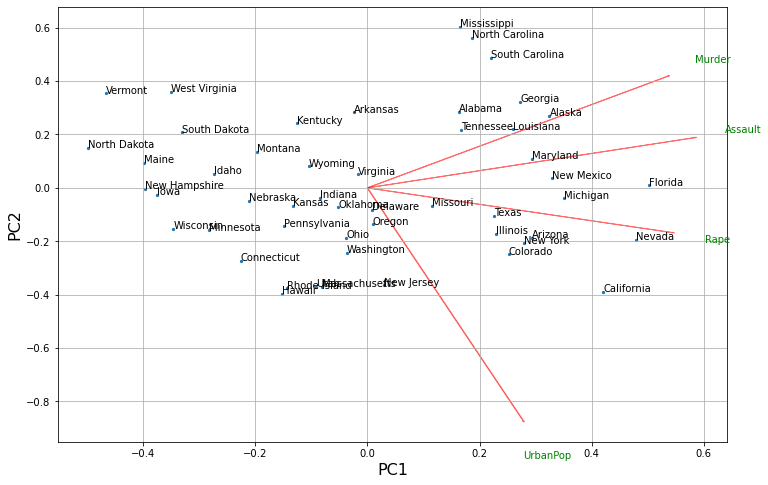

In [11]:
# generate biplot
biplot(principal_components[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(states))
plt.show()

The biplot above shows how the various US states are distributed based on PC1 (on the x-axis) and based on PC2 (on the y-axis). Interestingly, the eigenvectors for all 4 features point to the right, suggesting that they somewhat vary together along the x-axis. However, along the y-axis, Murder & Assault point to the top half, whereas Rape & UrbanPop point to the lower half.
</br> From the biplot, we can say that, for example, Georgia & Alaska are high in Murder, whereas its polar opposite, such as Connecticut, is low in Murder. Similarly, California, which is high in UrbanPop & Rape is the polar opposite of Vermont, which is low in both features.
</br> Next, the importance of the features within PC1 & PC2 is calculated below.

In [12]:
# Feature importance for PC1 and PC2
pc1 = abs(pca.components_[0])
pc2 = abs(pca.components_[1])

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.535899,0.418181
1,Assault,0.583184,0.187986
2,UrbanPop,0.278191,0.872806
3,Rape,0.543432,0.167319


We can see that most of the features contribute fairly evenly in PC1, with only UrbanPop having a little less importance. However, in PC2, UrbanPop has the highest importance. Next, to better understand the importance of the features for all four PC's, a heatmap is generated below.

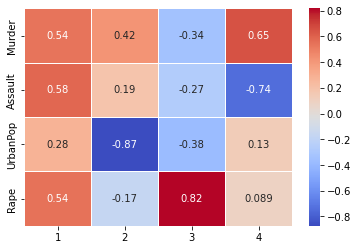

In [13]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1,5)).transpose()
ax = sns.heatmap(components,cmap='coolwarm', annot=True, linewidth=1)
plt.show()

The heatmap above shows the relationships between the 4 PC's (on the x-axis) and the features (on the y-axis). Here, because the data have been standardised, all principal components have a mean of 0.
- First, we can see that the PC1 is positively correlated with Murder, Assault & Rape. This suggests that these 3 features somewhat vary together (consistent with our initial observation from the biplot earlier).
- On the other hand, PC2 is strongly & negatively correlated with UrbanPop. It can be said that PC2 is a mainly a measure of urban population (again, this is consistent with our initial observation from the biplot earlier).
- PC3 mainly shows a strong positive correlation to Rape, and can be said to be mainly a measure of Rape.
- Lastly, PC4 is positively correlated to Murder, as well as being negatively correlated to Assault.
</br>
</br> Next, to determine which PC's explain most of the variation in the data, Scree plot & cumulative explained variance plot are generated below.

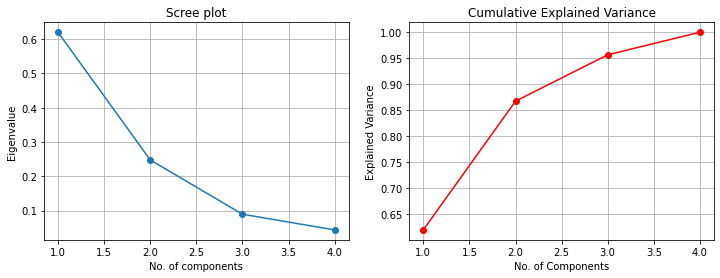

In [14]:
fig, axs = plt.subplots(1,2,figsize=(12,4))

# Scree plot
axs[0].plot(range(1,5), pca.explained_variance_ratio_, marker='o')
axs[0].set_xlabel('No. of components')
axs[0].set_ylabel('Eigenvalue')
axs[0].set_title("Scree plot")
axs[0].grid()

# Cumulative variance plot
axs[1].plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red', marker='o')
axs[1].set_ylabel('Explained Variance')
axs[1].set_xlabel('No. of Components')
axs[1].set_title("Cumulative Explained Variance")
axs[1].grid()

plt.show()

From the Scree & cumulative explained variance plots above, we can conclude that the first 3 PC's can explain 95% of the variation whithin the data. In principle, the 4 features can be reduced to 3 variables. However, a distinct sharp 'elbow' is not observed on the plots. Therefore, in the following sections, all 4 PC's were used (k = 4).

### Section 3 - Hierarchical Clustering

In this section, clustering using hierarchical clustering algorithm is performed. First, to determine which linkage methods to adopt, 3 dendrograms were generated using single, average & complete linkage methods (below).

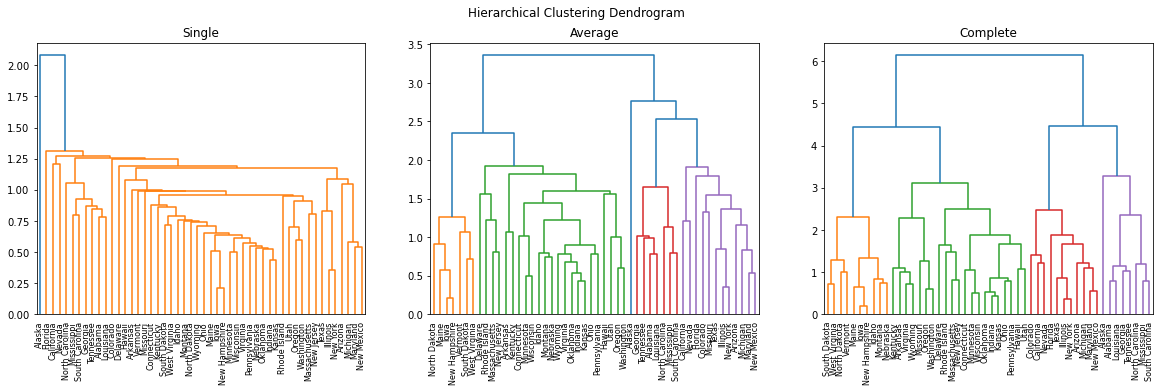

In [15]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

The complete linkage method produced the most balanced dendrogram. It is produced again for better visualisation below.

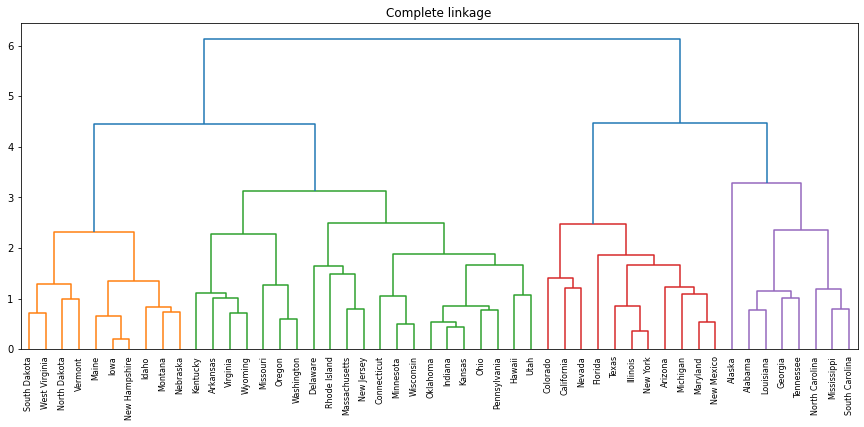

In [16]:
fig = plt.figure(figsize=(15,6))
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.title("Complete linkage")
plt.show()

Based on this, agglomerative clustering is performed. Afterwards, the 50 states are plotted along PC1 and PC2 axes and coloured based on their label (or group). Lastly, the silhouette score is also calculated below.

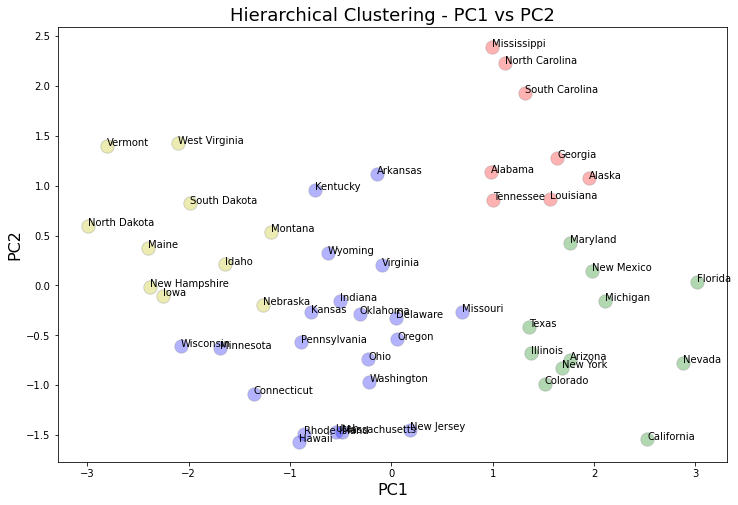

In [17]:
# We extract the first two principal components
a = principal_components[:,0]
b = principal_components[:,1]

k = 4
cluster = AgglomerativeClustering(n_clusters=k, linkage='complete')
y_pred = cluster.fit_predict(pca_df)

fig = plt.figure(figsize=(12,8))
colours = 'rbgy'
for i in range(k):
    plt.scatter(a[y_pred == i], b[y_pred == i], c = colours[i],
                s = 180, alpha = 0.3, edgecolors='grey', label = 'Cluster {}'.format(i))
for j in range(0,len(pca_df)):
        txt = states[j]
        plt.annotate(txt, (a[j], b[j]))
plt.xlabel('PC1',fontsize=16)
plt.ylabel('PC2',fontsize=16)
plt.title("Hierarchical Clustering - PC1 vs PC2",fontsize=18)
plt.show()

In [18]:
hierarchical_score = round(silhouette_score(x, cluster.labels_),2)
print('Silhouette score using hierarchical clustering algorithm is:', hierarchical_score)

Silhouette score using hierarchical clustering algorithm is: 0.32


### Section 4 - K-Means Clustering

To compare with the agglomerative clustering method above, K-means clustering is also performed (below). Similar to the above, the 50 states are plotted along PC1 and PC2 axes and coloured based on their label (or group). Lastly, the silhouette score is also calculated below.

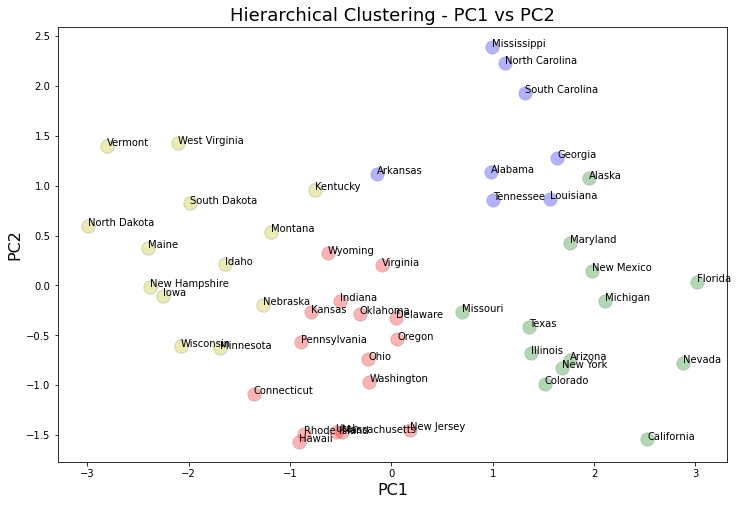

In [19]:
# Fit k-means
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

fig = plt.figure(figsize=(12,8))
colours = 'rbgy'
for i in range(k):
    plt.scatter(a[y_pred == i], b[y_pred == i], c = colours[i],
                s = 180, alpha = 0.3, edgecolors='grey', label = 'Cluster {}'.format(i))
for j in range(0,len(pca_df)):
        txt = states[j]
        plt.annotate(txt, (a[j], b[j]))
plt.xlabel('PC1',fontsize=16)
plt.ylabel('PC2',fontsize=16)
plt.title("Hierarchical Clustering - PC1 vs PC2",fontsize=18)
plt.show()

In [20]:
kmeans_score = round(silhouette_score(x, kmeans.labels_),2)
print('Silhouette score using K-Means clustering algorithm is:', kmeans_score)

Silhouette score using K-Means clustering algorithm is: 0.34


### Conclusion
The silhouette score for the agglomerative clustering method is 0.32, whereas that of the K-means method is similar at 0.34. Although both scores are > 0, they indicate that there is some overlap between the clusters. Although PCA indicates that at least the first 3 PC's explain most of the variations within the data, based on the current data, this is not really a significant reduction in dimentionality. As a result, for some states on the border between clusters, they can belong to either clusters based which algorithm is used. For instance, Kentucky, Arkansas, Minesotta, Wisconsin, Missouri are classified differently by agglomerative clustering method & K-means clustering.